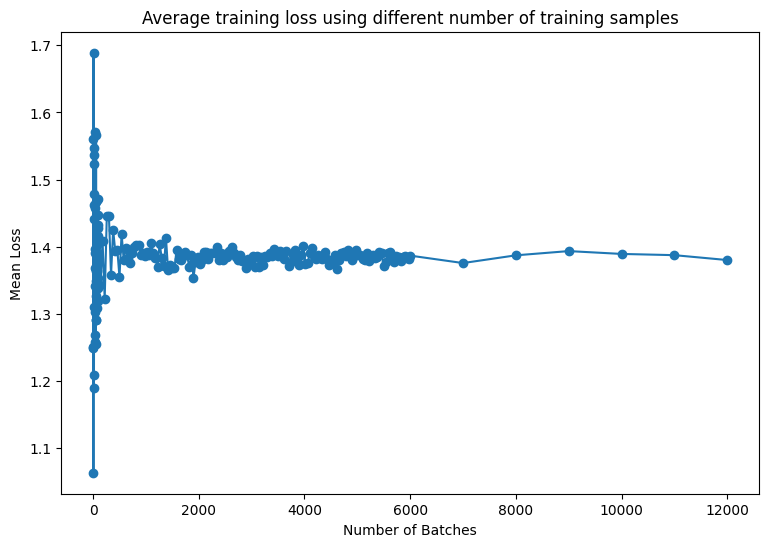

In [12]:
import matplotlib.pyplot as plt
import pickle

with open('./mean_loss_all-train.pkl','rb') as f:
    res = pickle.load(f)

mean_losses = []
for l in res['mean_losses']:
    mean_losses.append(l.to('cpu'))
plt.rcParams['figure.figsize'] = (9,6)
plt.plot(res['batch_nums'], mean_losses, marker='o')
plt.title('Average training loss using different number of training samples')
plt.ylabel('Mean Loss')
plt.xlabel('Number of Batches')
plt.show()

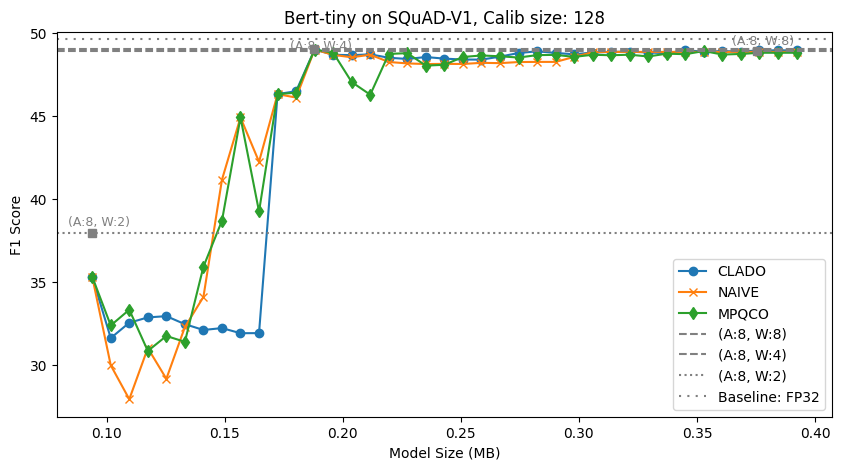

In [18]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

methods = ["clado", "naive", "mpqco"]
size_bounds = np.linspace(0.0939, 0.40, 40)

n_runs = 3
n_constraints = len(size_bounds)

# n_runs x n_constraints 
clado_f1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_f1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_f1 = [[0 for _ in range(n_constraints)] for _ in range(n_runs)] 
clado_exact_match = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_exact_match = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_exact_match = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
clado_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
naive_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]
mpqco_eval_loss = [[0 for _ in range(n_constraints)] for _ in range(n_runs)]

batch_num = 256
for repeat in range(n_runs):
    start_batch = batch_num * repeat
    end_batch = batch_num * repeat + batch_num - 1
    n_samples = batch_num * 8
    file_name = f'./variance_study/Clado_Naive_MPQCO_res_bert-tiny/sample_size{n_samples}/clado_naive_mpqco_a8_w8-4-2_calib128_batches_{start_batch}-{end_batch}_bs8_40-size-cons.pkl'
    with open(file_name,'rb') as f:
        res = pickle.load(f)  
    for method in methods:
        j = 0  
        for item in eval(f'res["{method}_res"]'):
            eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
            cmd = f'{method}_f1[repeat][j] = {eval_f1}'
            exec(cmd)
            cmd = f'{method}_exact_match[repeat][j] = {eval_exact_match}'
            exec(cmd)
            cmd = f'{method}_eval_loss[repeat][j] = {eval_loss}'
            exec(cmd)
            j += 1

f1_clado = np.array(clado_f1)
f1_naive = np.array(naive_f1)
f1_mpqco = np.array(mpqco_f1)

with open('./rand_quant_a8_w8-4-2_calib128.pkl','rb') as f:
    res128_rand_quant = pickle.load(f)
rand_quant_eval_f1, rand_quant_eval_exact_match, rand_quant_size, rand_quant_bitops = [], [], [], []

xs = size_bounds[0:-1]
y_clado =  np.mean(f1_clado, axis=0)
y_naive =  np.mean(f1_naive, axis=0)
y_mpqco =  np.mean(f1_mpqco, axis=0)

plt.rcParams['figure.figsize'] = (10,5)
#plt.axis([0.15, 0.39, 38, 50])

plt.plot(xs, y_clado[0:-1], marker='o', label=f'CLADO')
plt.plot(xs, y_naive[0:-1], marker='x', label=f'NAIVE')
plt.plot(xs, y_mpqco[0:-1], marker='d', label=f'MPQCO')

plt.plot([0.375244141],[48.9000], color='gray', marker='s')
plt.annotate("(A:8, W:8)", (0.365, 49.30), size=9, color='gray')
plt.axhline(y=48.90, color='gray', linestyle='--', label='(A:8, W:8)')

plt.plot([0.18762207],[48.995145577466914], color='gray', marker='s')
plt.annotate("(A:8, W:4)", (0.17762207, 48.995145577466914), size=9, color='gray')
plt.axhline(y=48.995145577466914, color='gray', linestyle='--', label='(A:8, W:4)')

plt.plot([0.093811035],[37.91], color='gray', marker='s')
plt.annotate("(A:8, W:2)", (0.083811035, 38.41), size=9, color='gray')
plt.axhline(y=37.91, color='gray', linestyle=':', label='(A:8, W:2)')

plt.axhline(y=49.59, color='gray', linestyle=(0, (1, 3)), label='Baseline: FP32')

plt.title('Bert-tiny on SQuAD-V1, Calib size: 128')
plt.ylabel('F1 Score')
plt.xlabel('Model Size (MB)')
plt.legend()
plt.show()

(3, 8, 40)


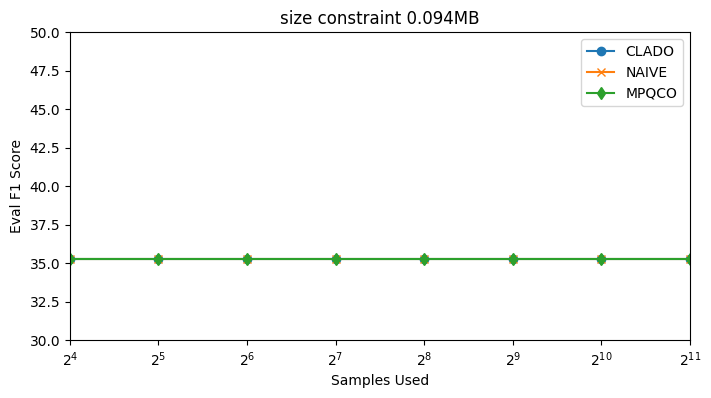

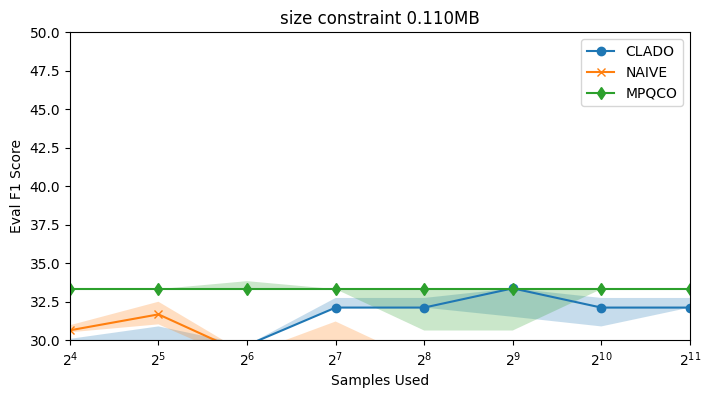

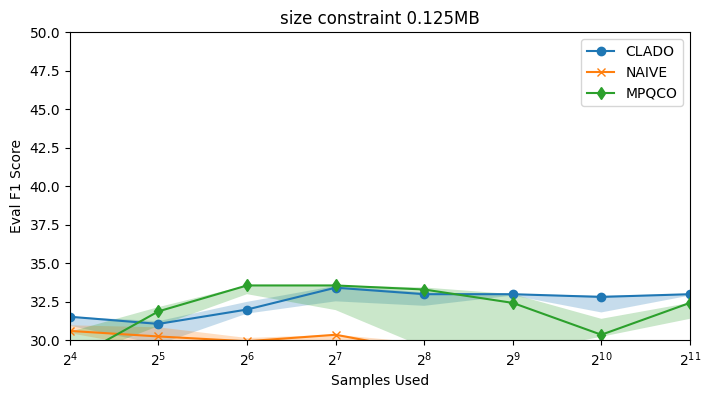

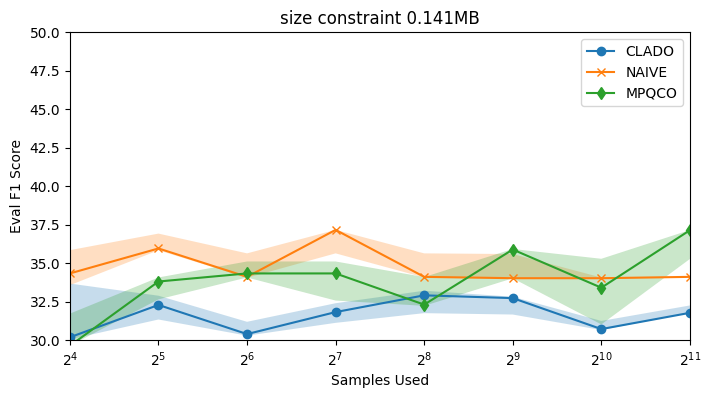

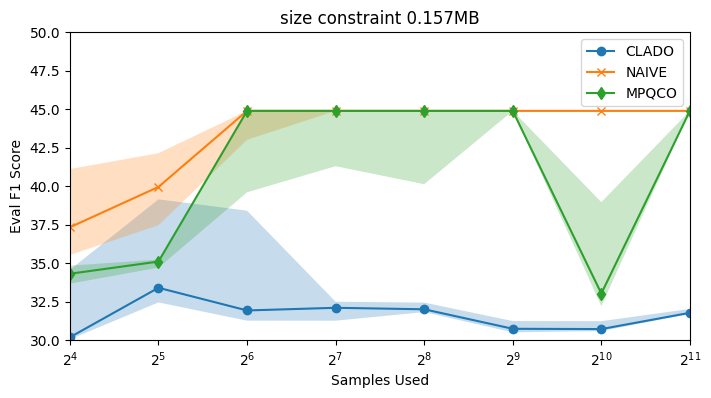

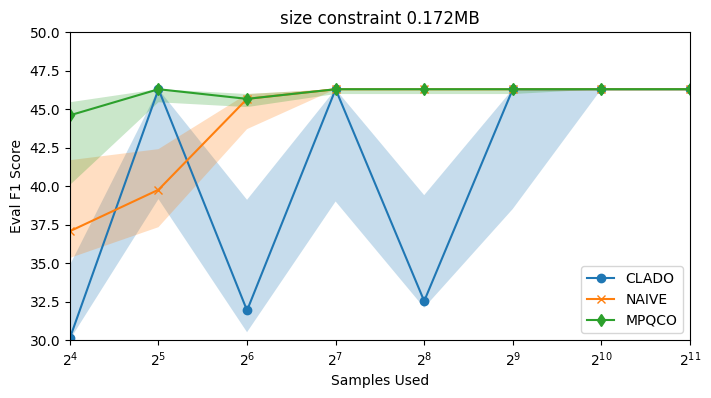

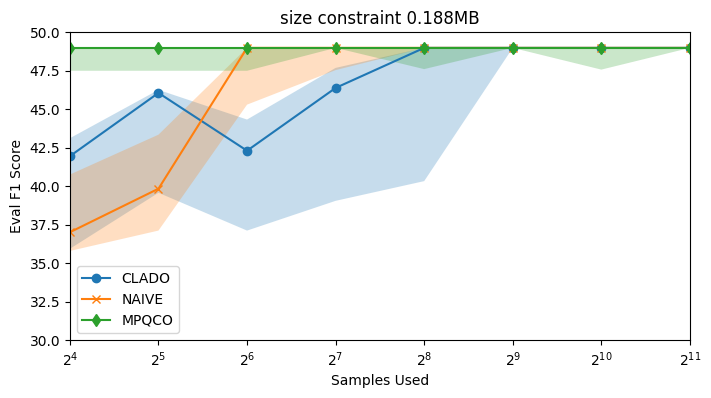

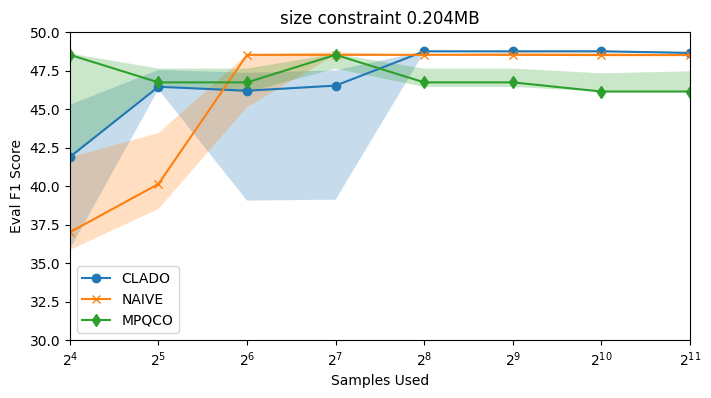

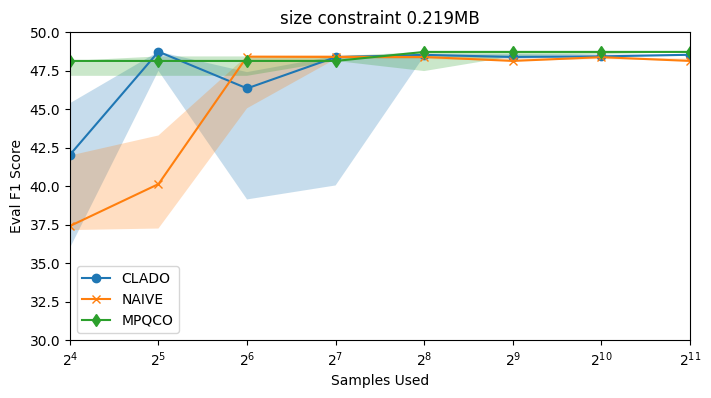

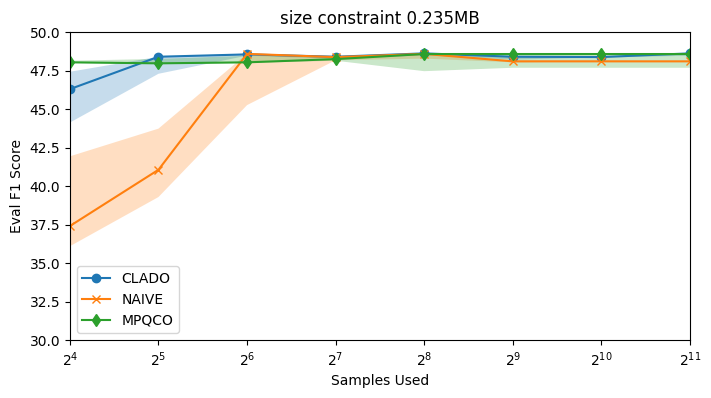

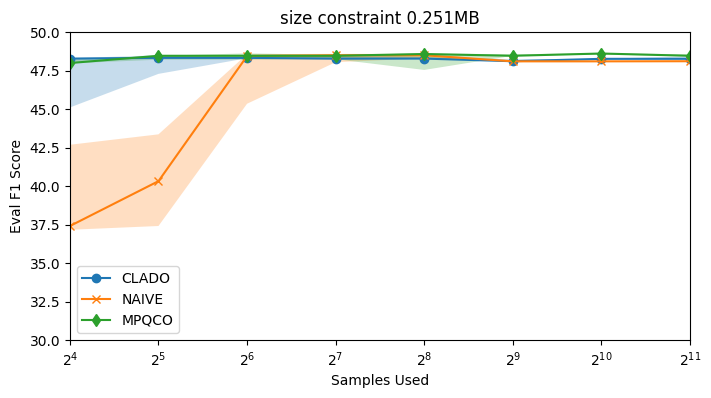

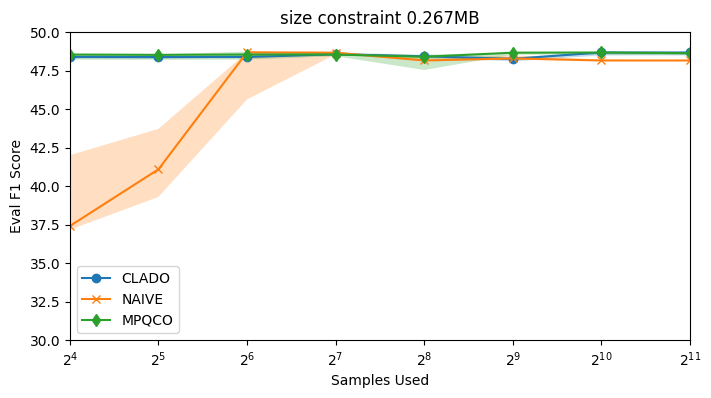

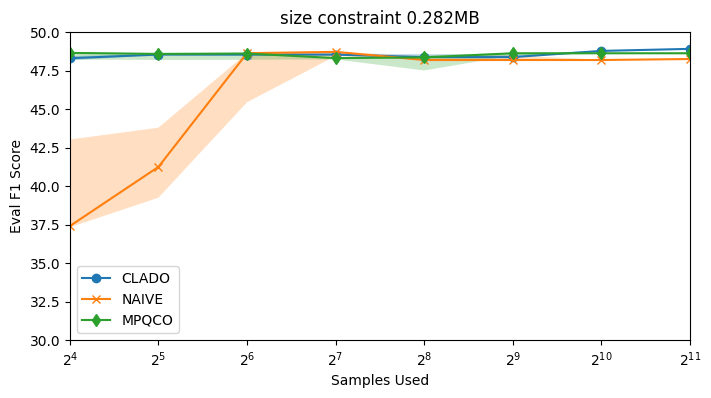

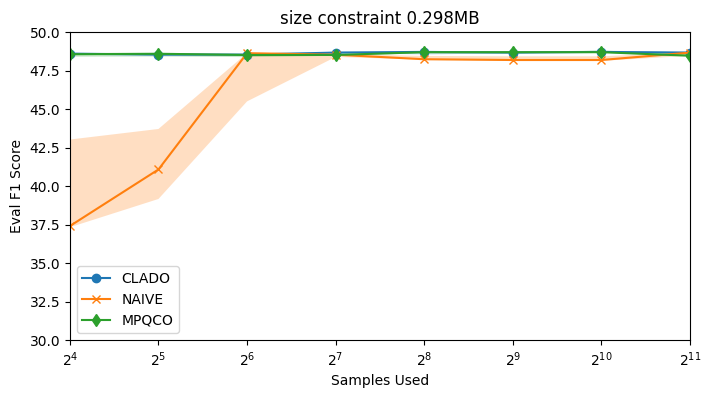

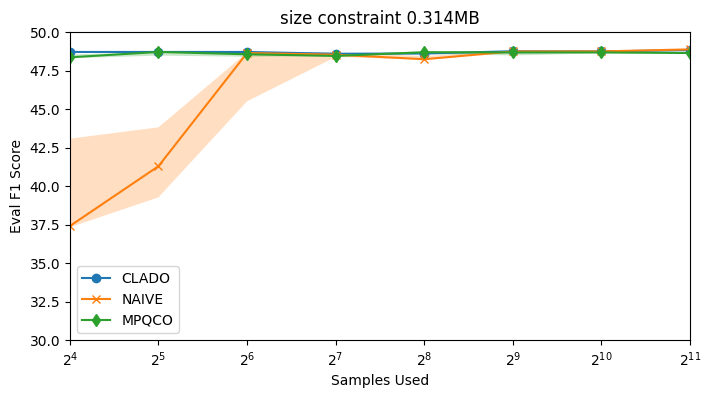

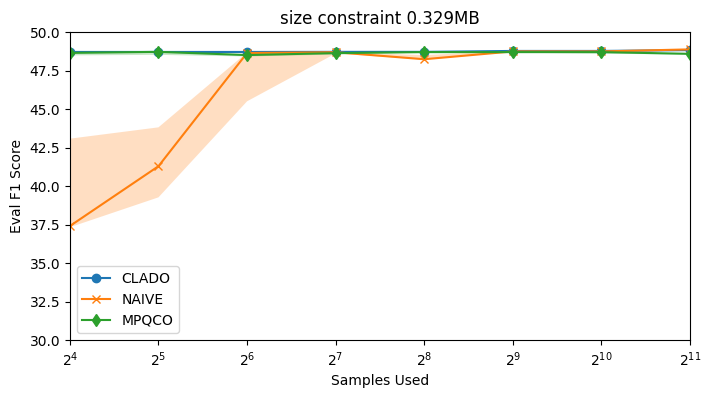

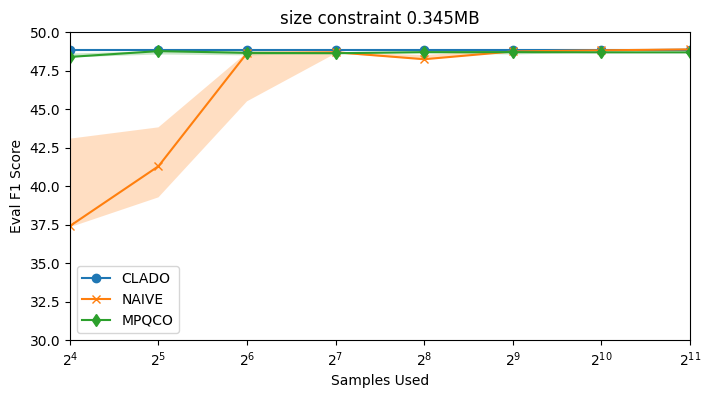

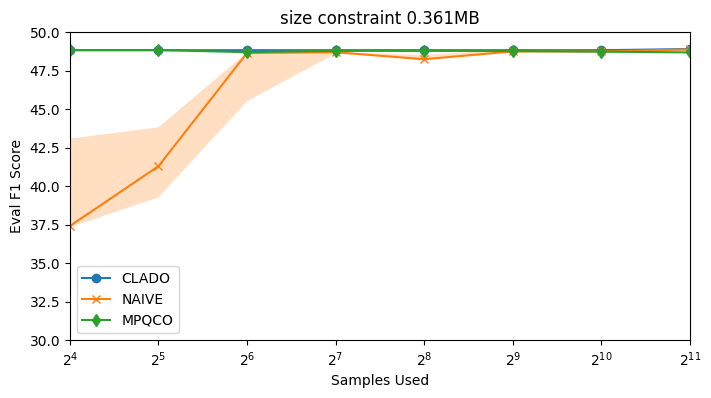

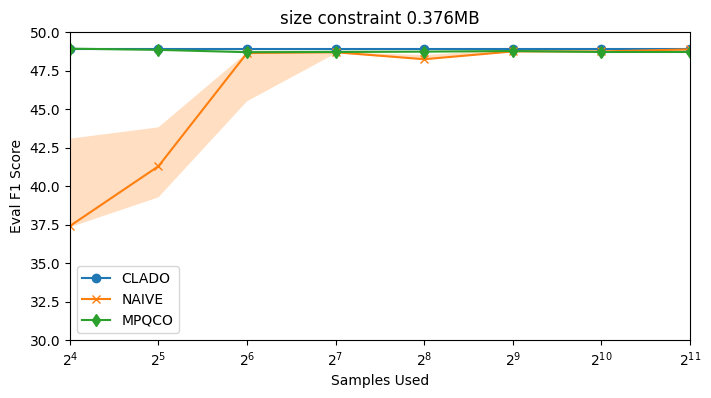

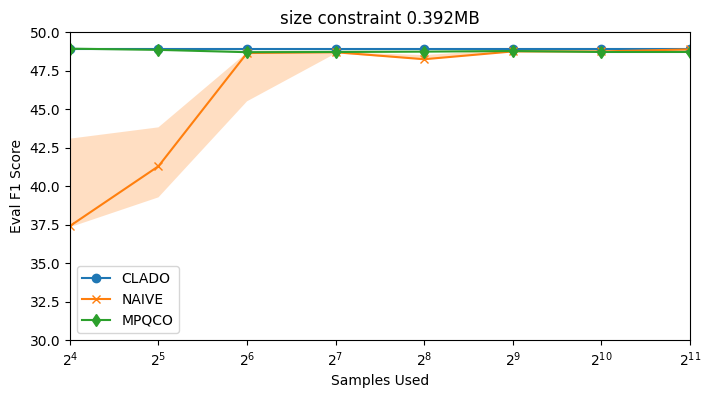

In [23]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

batch_nums = [2, 4, 8, 16, 32, 64, 128, 256]
methods = ["clado", "naive", "mpqco"]
size_bounds = np.linspace(0.0939, 0.40, 40)

n_runs = 3
n_sizes = len(batch_nums)
n_constraints = len(size_bounds)

# n_runs x n_batches x n_constraints 
clado_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_f1 = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)] 
clado_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_exact_match = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
clado_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
naive_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]
mpqco_eval_loss = [[[0 for _ in range(n_constraints)] for _ in range(n_sizes)] for _ in range(n_runs)]


for i, batch_num in enumerate(batch_nums):
    for repeat in range(n_runs):
        start_batch = batch_num * repeat
        end_batch = batch_num * repeat + batch_num - 1
        n_samples = batch_num * 8
        file_name = f'./variance_study/Clado_Naive_MPQCO_res_bert-tiny/sample_size{n_samples}/clado_naive_mpqco_a8_w8-4-2_calib128_batches_{start_batch}-{end_batch}_bs8_40-size-cons.pkl'
        with open(file_name,'rb') as f:
            res = pickle.load(f)  
        for method in methods:
            j = 0  
            for item in eval(f'res["{method}_res"]'):
                eval_f1, eval_exact_match, eval_loss, size, bitops, _ = item
                cmd = f'{method}_f1[repeat][i][j] = {eval_f1}'
                exec(cmd)
                cmd = f'{method}_exact_match[repeat][i][j] = {eval_exact_match}'
                exec(cmd)
                cmd = f'{method}_eval_loss[repeat][i][j] = {eval_loss}'
                exec(cmd)
                j += 1

f1_clado = np.array(clado_f1)
f1_naive = np.array(naive_f1)
f1_mpqco = np.array(mpqco_f1)
print(f1_clado.shape)
xs = 2**np.arange(f1_clado.shape[1]) * 16
for i in range(0, f1_clado.shape[2], 2):
    plt.rcParams['figure.figsize'] = (8,4)
    plt.axis([16, 2048, 30, 50])

    plt.plot(xs, np.quantile(f1_clado[:,:,i],0.5,axis=0),marker='o',label=f'CLADO')
    plt.fill_between(xs,np.quantile(f1_clado[:,:,i],0.75,axis=0),
                     np.quantile(f1_clado[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs, np.quantile(f1_naive[:,:,i],0.5,axis=0),marker='x',label=f'NAIVE')
    plt.fill_between(xs,np.quantile(f1_naive[:,:,i],0.75,axis=0),
                    np.quantile(f1_naive[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs, np.quantile(f1_mpqco[:,:,i],0.5,axis=0),marker='d',label=f'MPQCO')
    plt.fill_between(xs,np.quantile(f1_mpqco[:,:,i],0.75,axis=0),
                     np.quantile(f1_mpqco[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.legend()
    plt.ylabel('Eval F1 Score')
    plt.xlabel('Samples Used')
    plt.title(f'size constraint {size_bounds[i]:.3f}MB')
    plt.xscale('log',base=2)
    plt.show()

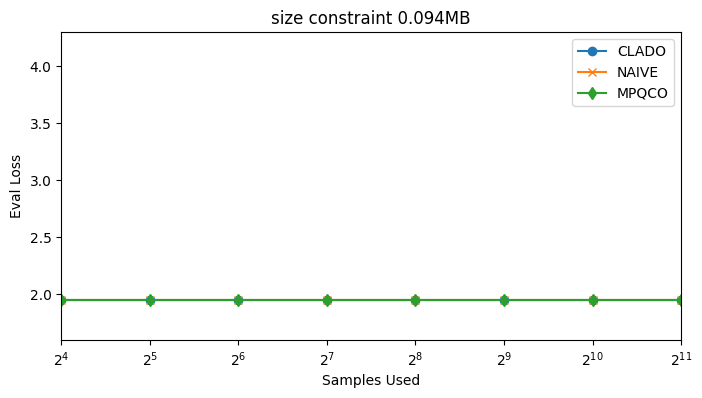

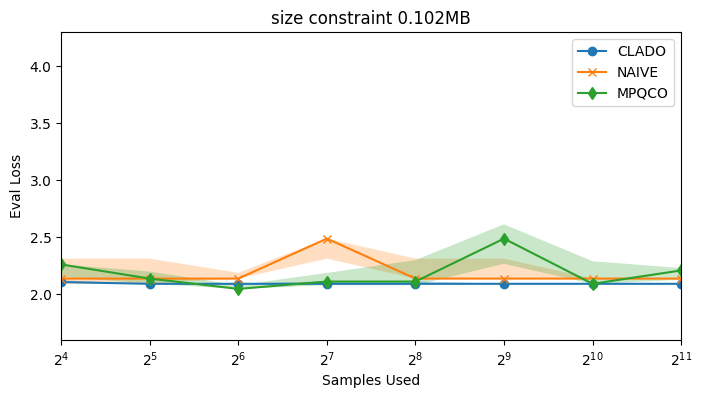

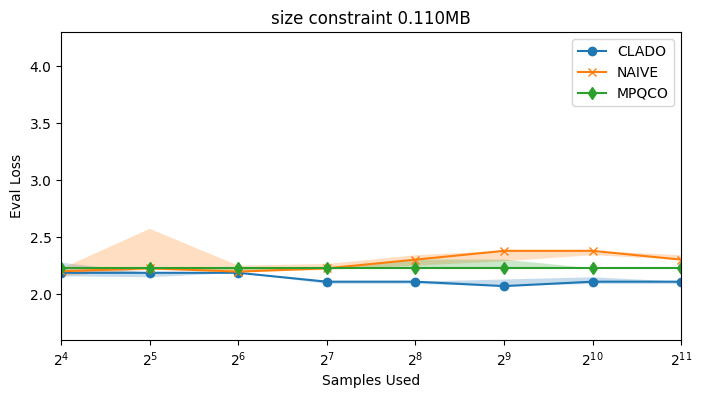

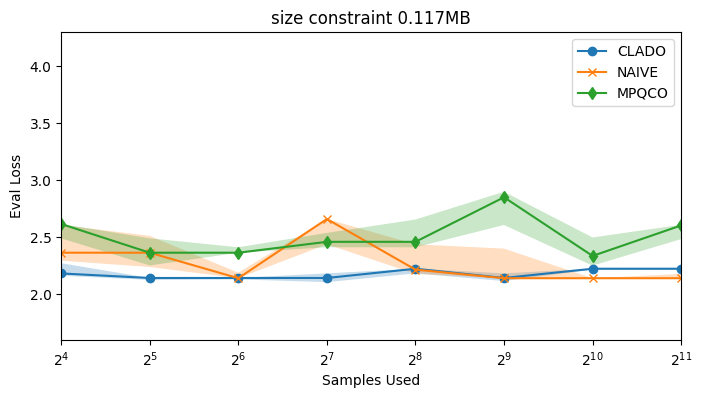

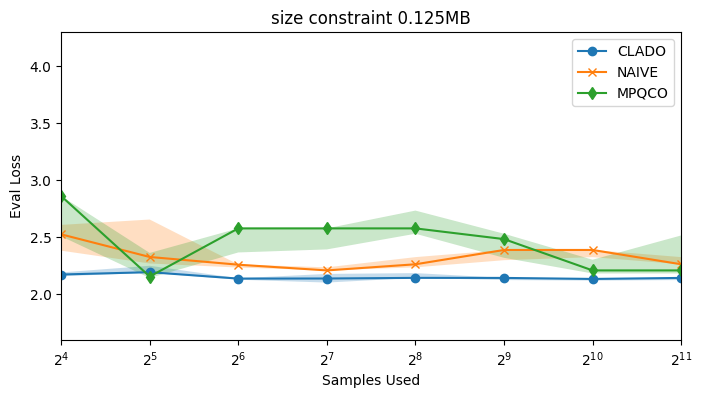

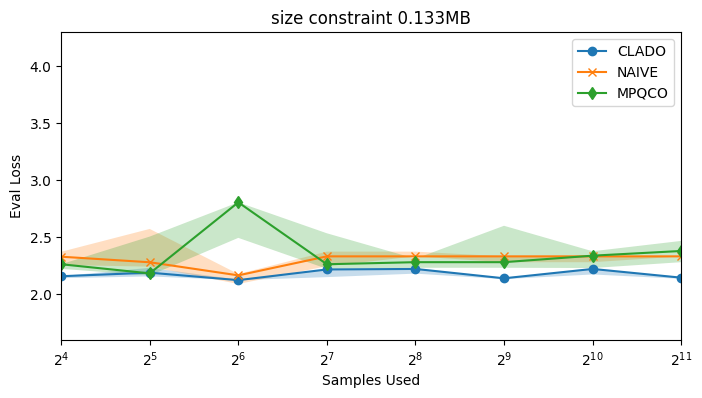

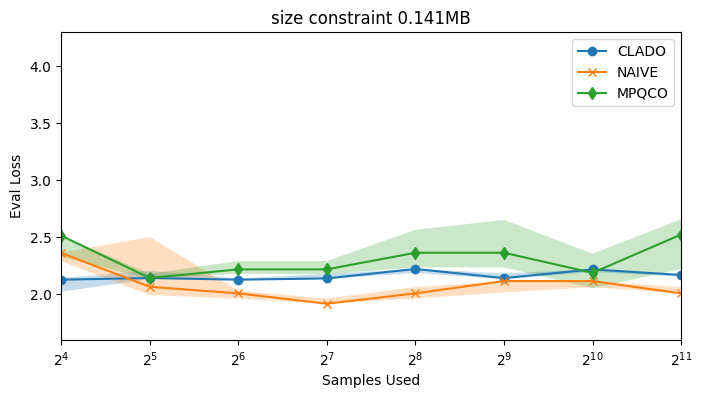

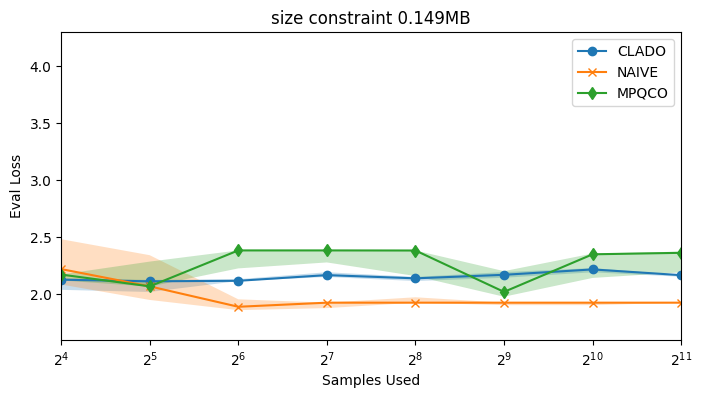

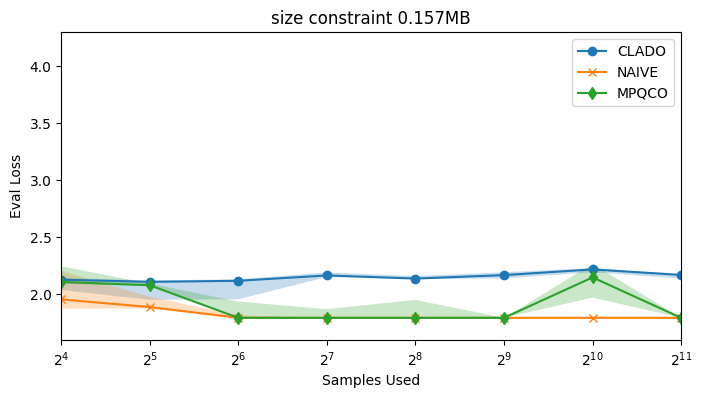

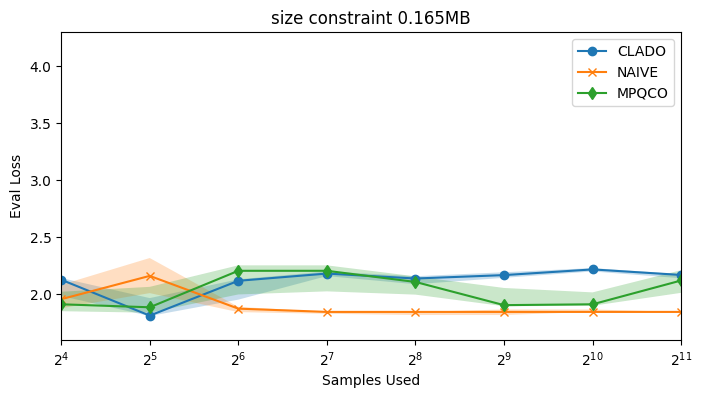

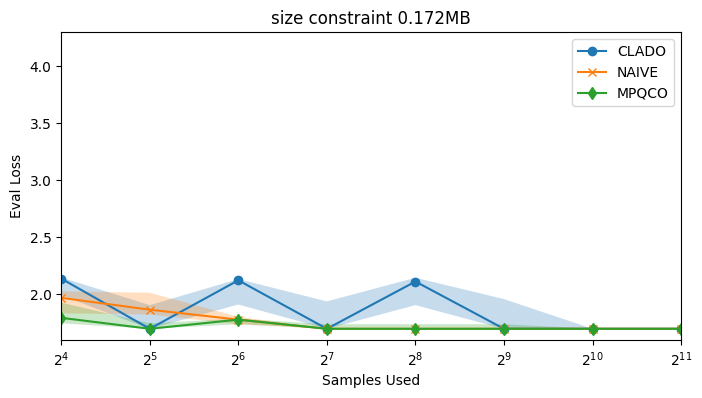

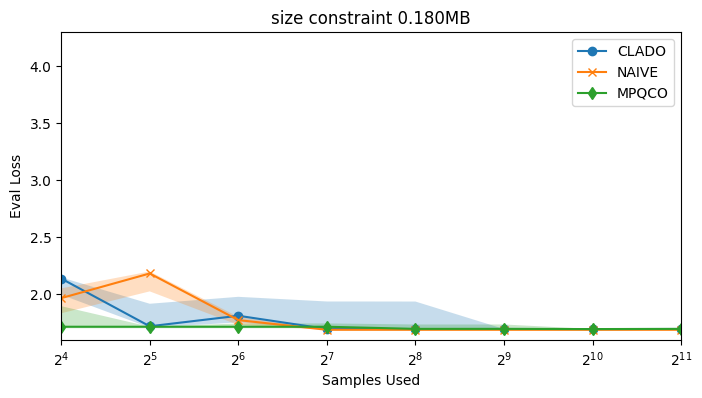

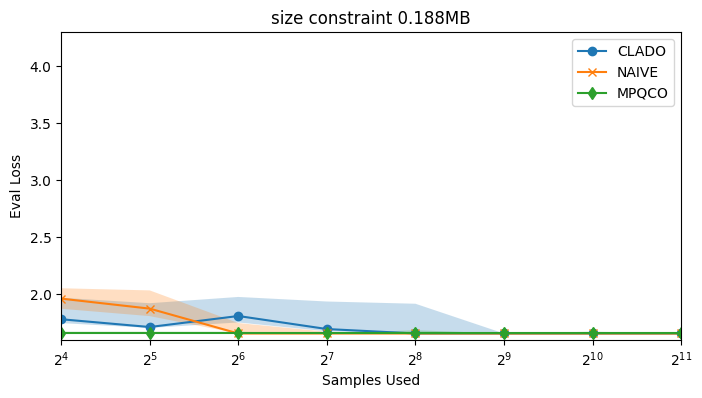

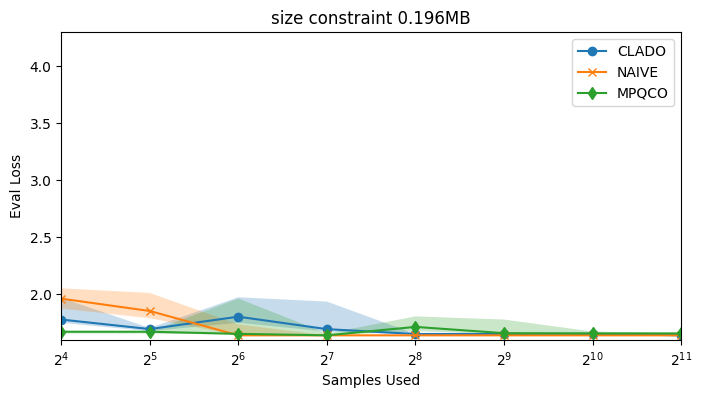

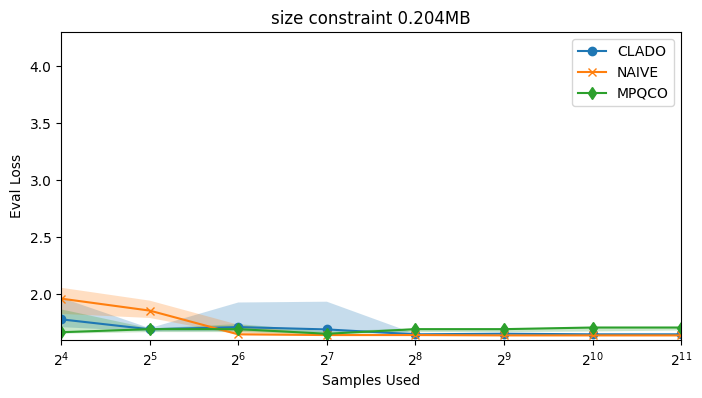

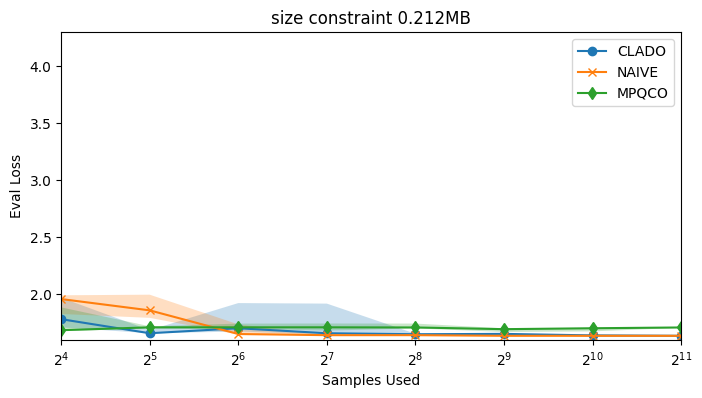

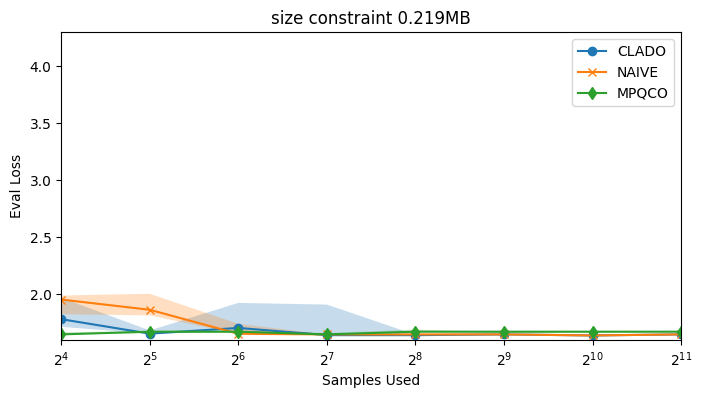

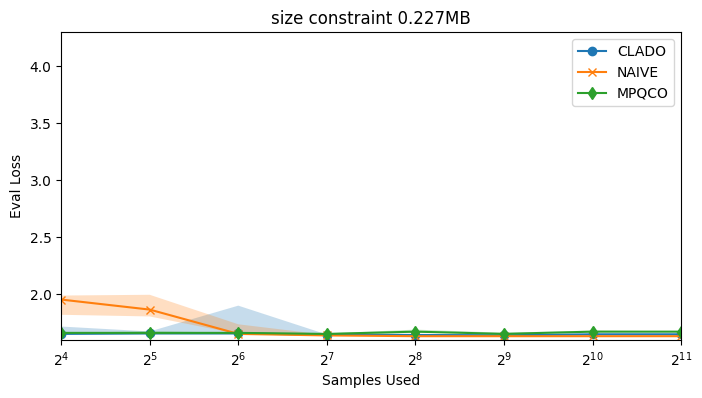

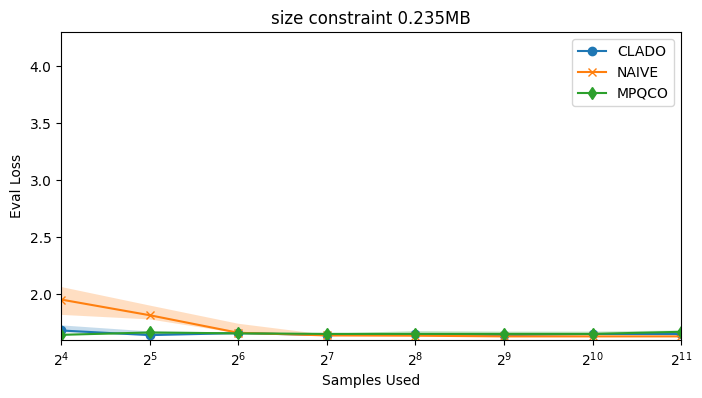

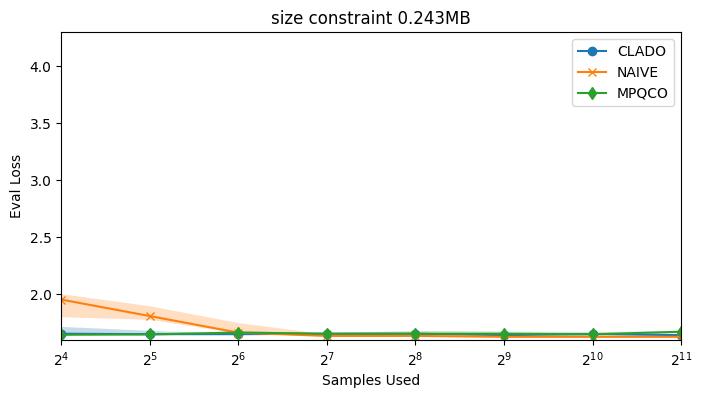

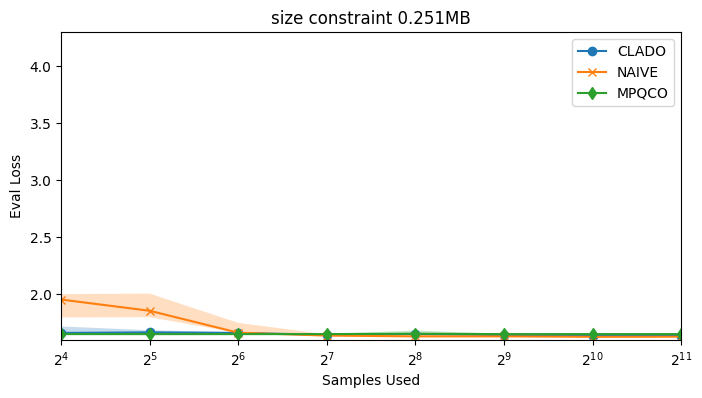

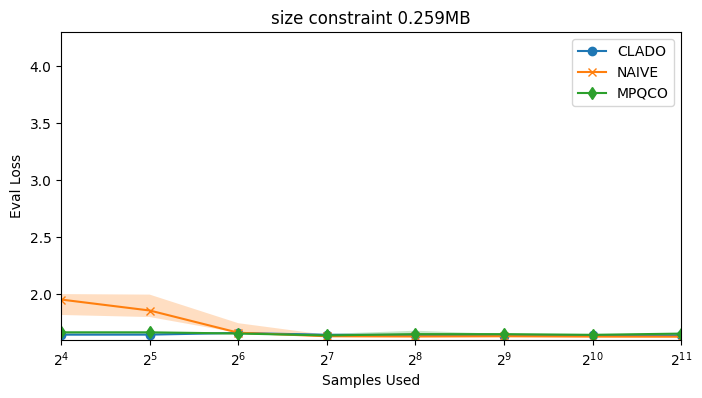

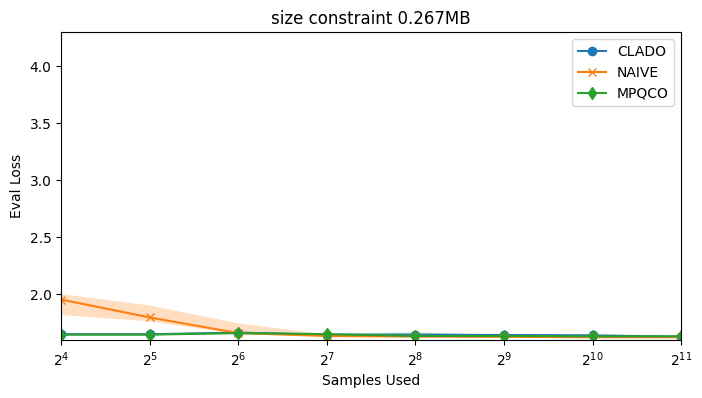

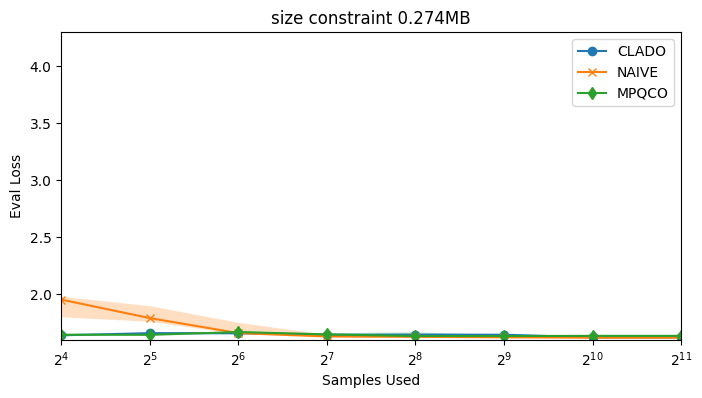

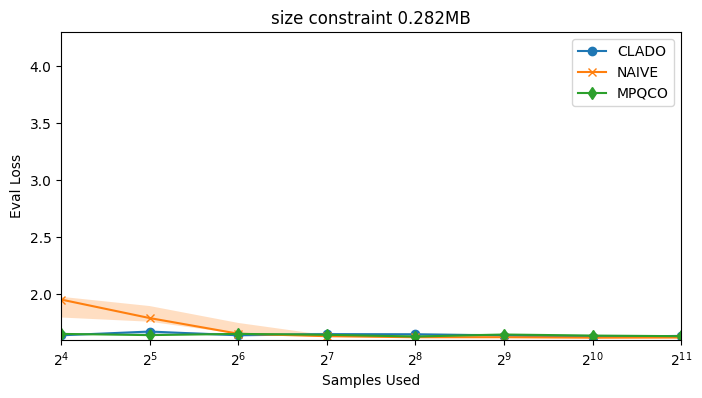

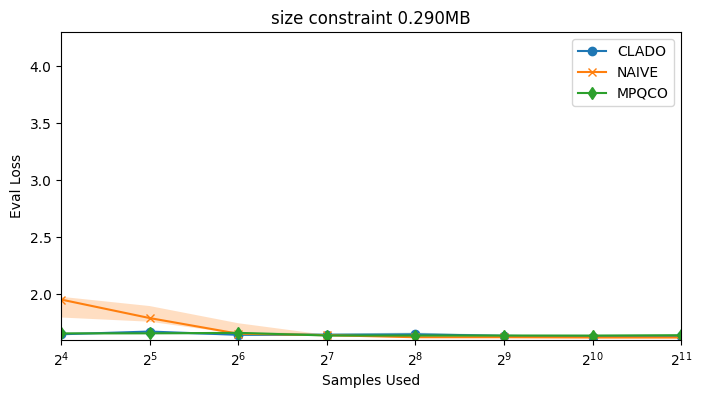

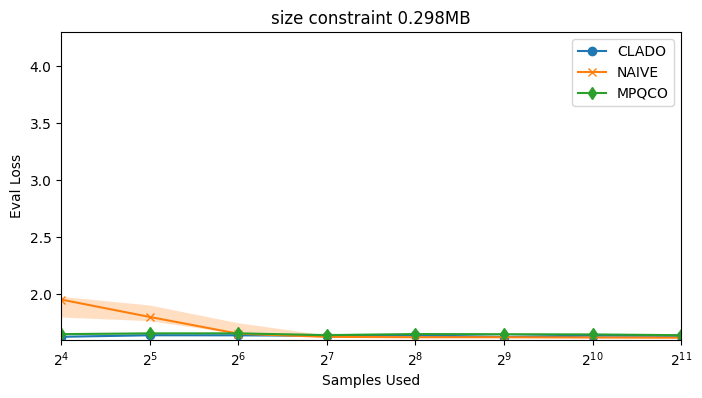

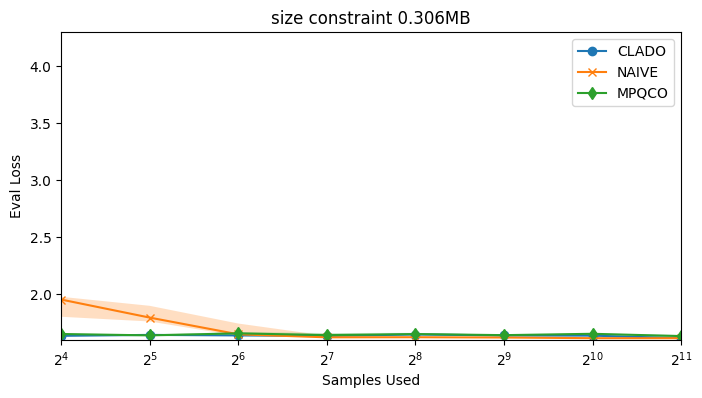

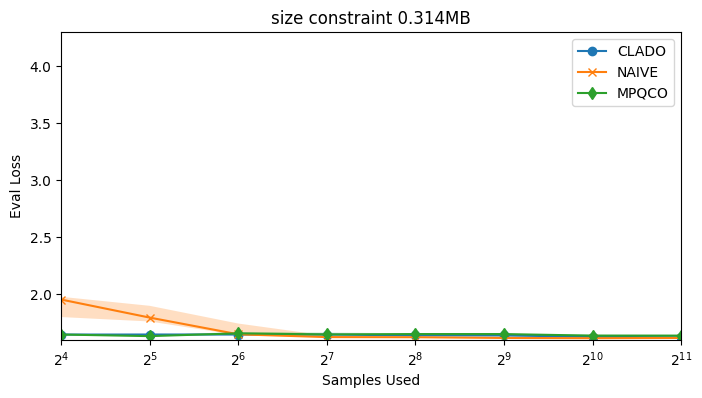

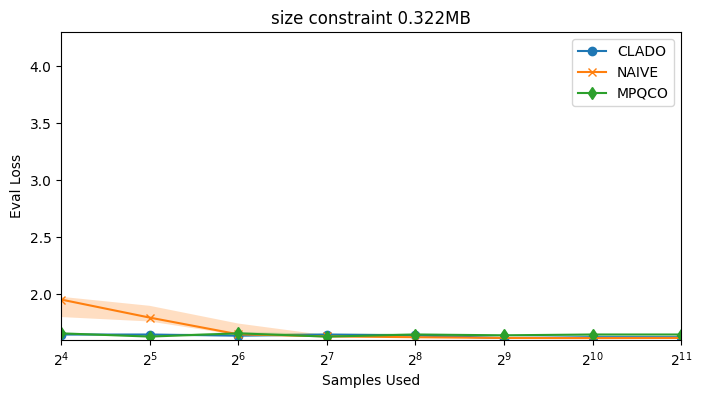

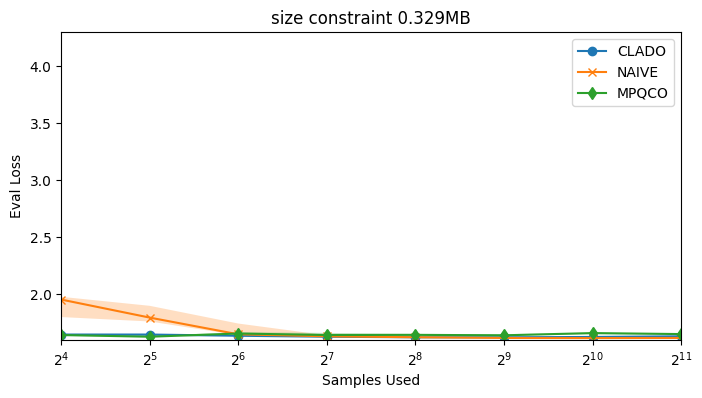

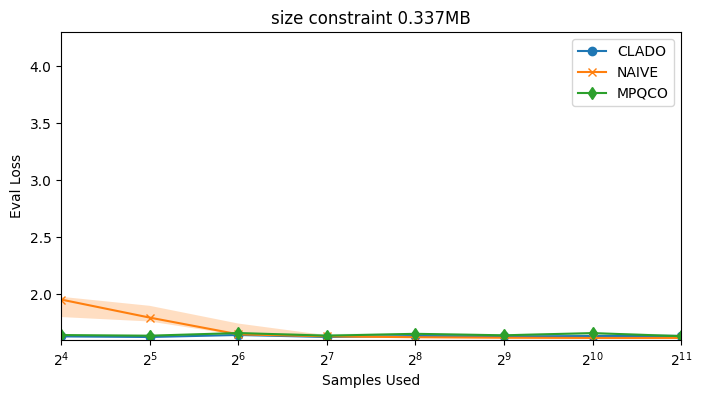

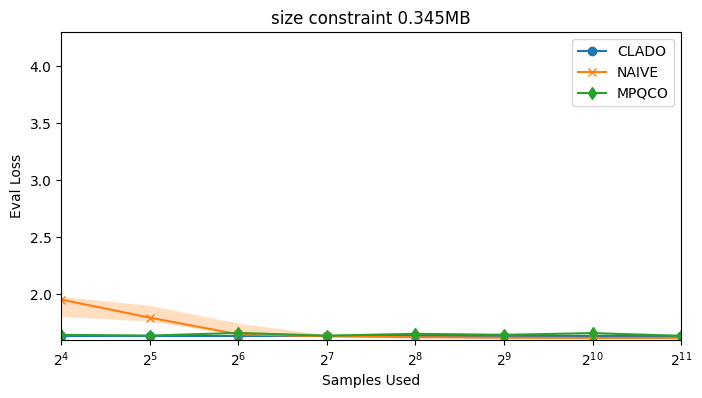

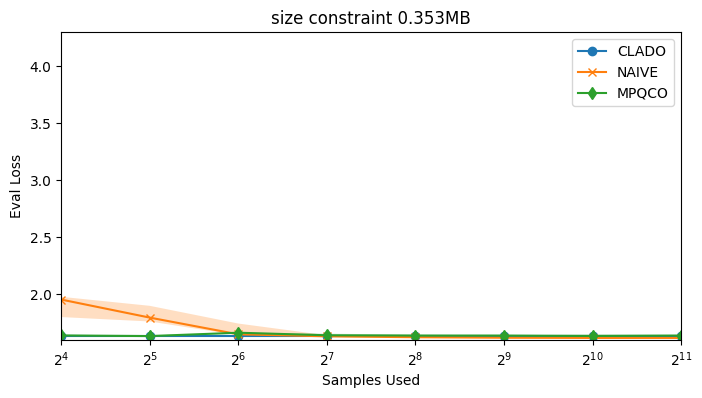

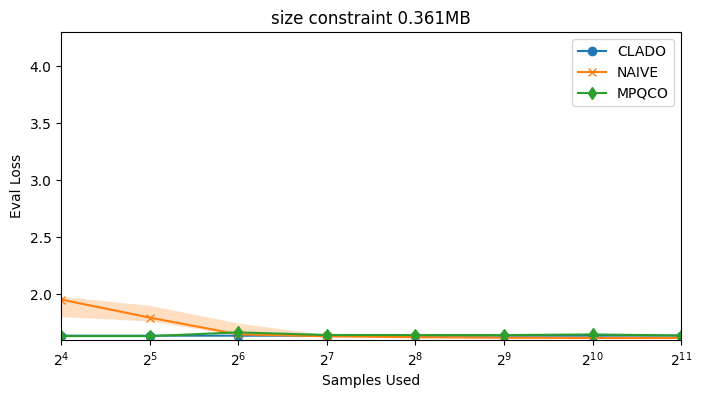

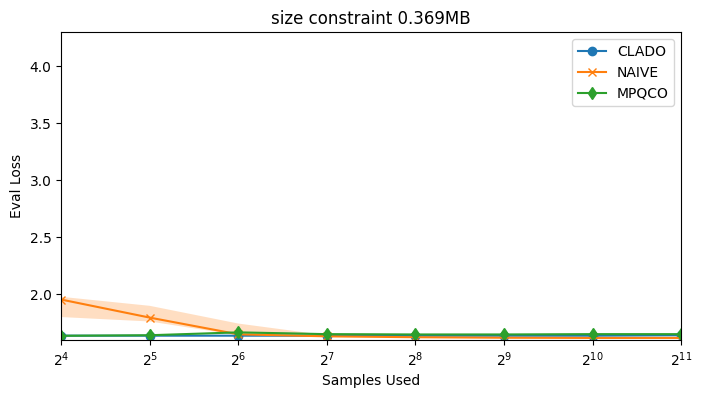

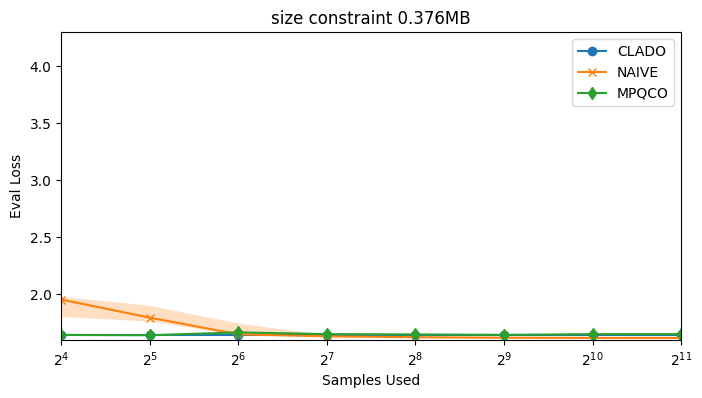

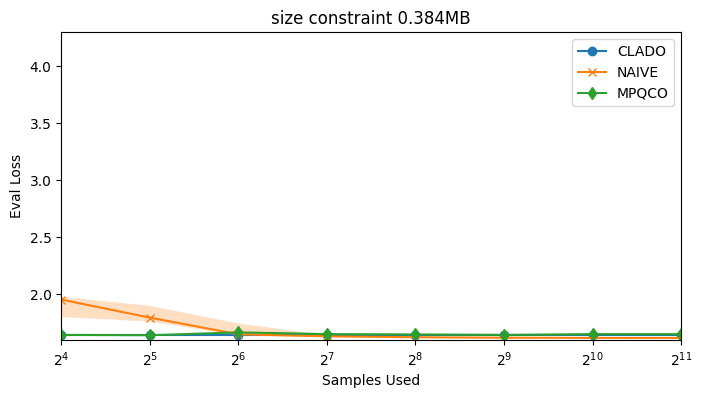

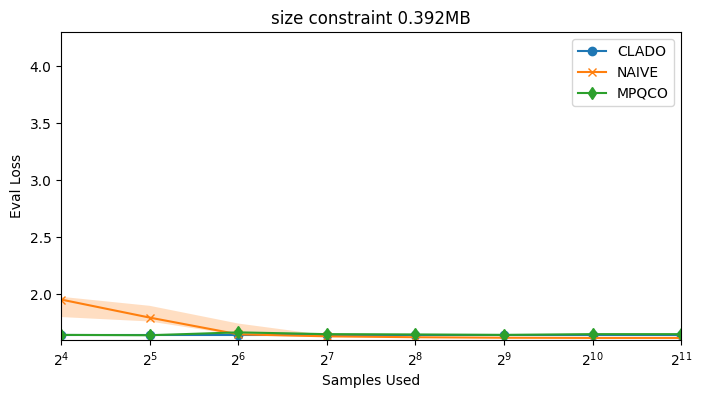

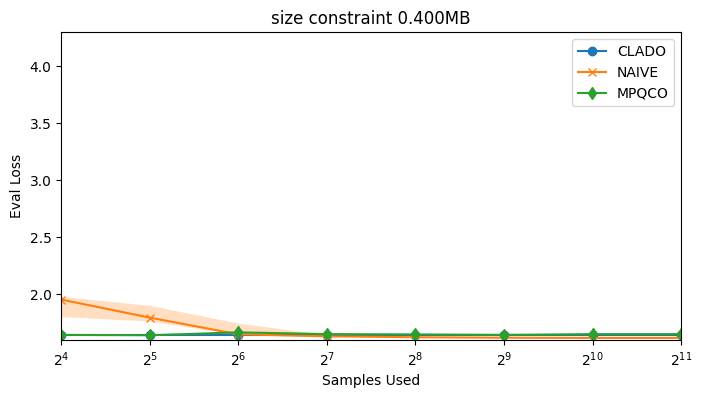

In [20]:
eval_loss_clado = np.array(clado_eval_loss)
eval_loss_naive = np.array(naive_eval_loss)
eval_loss_mpqco = np.array(mpqco_eval_loss)

for i in range(0, f1_clado.shape[2], 1):
    plt.rcParams['figure.figsize'] = (8,4)
    plt.axis([16, 2048, 1.6, 4.3])
    plt.plot(xs, np.quantile(eval_loss_clado[:,:,i],0.5,axis=0),marker='o',label=f'CLADO')
    plt.fill_between(xs,np.quantile(eval_loss_clado[:,:,i],0.75,axis=0),
                     np.quantile(eval_loss_clado[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs, np.quantile(eval_loss_naive[:,:,i],0.5,axis=0),marker='x',label=f'NAIVE')
    plt.fill_between(xs,np.quantile(eval_loss_naive[:,:,i],0.75,axis=0),
                    np.quantile(eval_loss_naive[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.plot(xs,np.quantile(eval_loss_mpqco[:,:,i],0.5,axis=0),marker='d',label=f'MPQCO')
    plt.fill_between(xs,np.quantile(eval_loss_mpqco[:,:,i],0.75,axis=0),
                     np.quantile(eval_loss_mpqco[:,:,i],0.25,axis=0),alpha=0.25)
    
    plt.legend()
    plt.ylabel('Eval Loss')
    plt.xlabel('Samples Used')
    plt.title(f'size constraint {size_bounds[i]:.3f}MB')
    plt.xscale('log',base=2)
    plt.show()